## Building a GPT

Loosely derived from Karpathy's [Zero To Hero](https://karpathy.ai/zero-to-hero.html) video on GPT. Significant changes for my understanding (kma@pebblebed.com)

In [2]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd


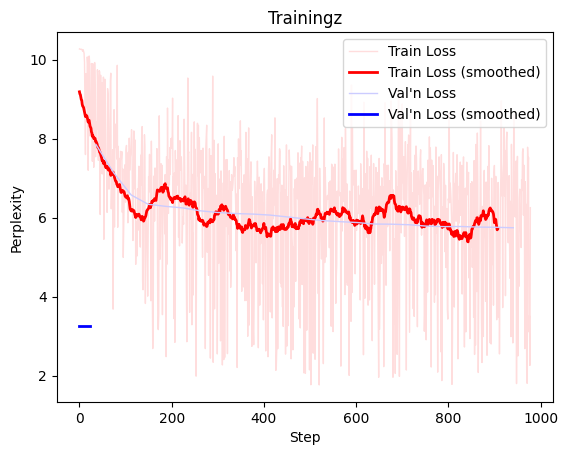

In [18]:
tdat = pd.read_csv('lightning_logs/version_9/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]
if True:
    import matplotlib.pyplot as plt

    xspace = np.linspace(0, len(train), len(train))
    fsz = max(20, len(train)//20)
    filter = np.ones(fsz)/fsz
    # filter =  np.linspace(0.25, 1.75, num=fsz)/fsz

    plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
    plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
    if True or 'val_loss' in tdat:
        val = tdat.val_loss[~np.isnan(tdat.val_loss)]
        plt.plot( val, label = 'Val\'n Loss', color='#ccf', linewidth=1)
        plt.plot( np.convolve(val, filter, mode='valid'), label = 'Val\'n Loss (smoothed)', color='b', linewidth=2)

    plt.xlabel('Step')
    plt.ylabel('Perplexity')
    plt.legend(loc='upper right')
    plt.title('Trainingz')
    plt.show()


In [9]:
np.mean(tdat.train_loss[-100:])


6.709836692810058

In [5]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

1801     10.155393
3603     10.152255
5406     10.143173
7208     10.131415
9010     10.120088
10813    10.118307
12615    10.118072
14417    10.117672
16220    10.117546
18022    10.117523
19824    10.117784
21627    10.117499
23429    10.117519
25231    10.117517
27034    10.126449
28836    10.126448
30638    10.134905
32441    10.134904
34243    10.134904
Name: val_loss, dtype: float64